<a href="https://colab.research.google.com/github/Mishak7/Finance/blob/main/Financial_Econometrics_Seminar_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
hedgefunds = pd.read_excel('/content/drive/MyDrive/HSE/hedgefunds.xls')
hedgefunds['datevec'] = pd.to_datetime(hedgefunds['datevec'],format = "%d/%m/%Y")
hedgefunds.set_index('datevec', inplace=True)
hedgefunds

,d_fri,d_hol,d_thurs,d_tues,d_wed,r_convertible,r_distressed,r_dow,r_equity,r_event,r_ff,r_macro,r_merger,r_nasdaq,r_neutral,r_sp500,rf
datevec,,,,,,,,,,,,,,,,,
2003-04-01,0,0,0,1,0,0.054,0.029,0.967883,0.376,0.045,1.07,0.151,0.103,0.530217,0.252,1.207051,0.005
2003-04-02,0,0,0,0,1,0.067,0.111,2.631776,0.453,0.258,2.49,0.099,-0.067,3.528209,-0.415,2.578073,0.005
2003-04-03,0,0,1,0,0,0.193,0.441,-0.540743,0.142,0.184,-0.48,-0.349,0.247,-0.010024,-0.150,-0.506445,0.005
2003-04-04,1,0,0,0,0,0.185,0.222,0.445225,-0.153,0.125,0.15,0.017,-0.164,-0.940264,-0.072,0.273458,0.005
2003-04-07,0,0,0,0,0,0.126,0.132,0.280620,-0.392,0.116,0.22,-0.294,-0.023,0.432742,-0.186,0.122812,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-05-24,0,0,0,0,0,0.030,-0.097,-1.251944,-0.017,-0.052,-1.23,0.431,-0.344,-0.697344,-0.202,-1.299212,0.001
2010-05-25,0,0,0,1,0,-0.538,-0.527,-0.226948,-0.275,-0.668,-0.01,0.302,0.132,-0.117527,-0.103,0.035387,0.001
2010-05-26,0,0,0,0,1,0.226,0.244,-0.692373,0.243,0.305,-0.29,0.043,0.033,-0.683941,0.040,-0.567701,0.001


#### Forecasting neutral hedgefund with AR(2)

In [9]:
from statsmodels.tsa.ar_model import AutoReg

train_neutral = hedgefunds.loc[:'2010-05-21', 'r_neutral']
test_neutral = hedgefunds.loc['2010-05-24':, 'r_neutral']

ar_model_neutral = AutoReg(train_neutral, 2).fit()
print(ar_model_neutral.summary())

                            AutoReg Model Results                             
Dep. Variable:              r_neutral   No. Observations:                 1864
Model:                     AutoReg(2)   Log Likelihood                -250.586
Method:               Conditional MLE   S.D. of innovations              0.277
Date:                Wed, 22 Oct 2025   AIC                            509.173
Time:                        19:31:04   BIC                            531.290
Sample:                    04-03-2003   HQIC                           517.323
                         - 05-21-2010                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0001      0.006     -0.023      0.981      -0.013       0.012
r_neutral.L1     0.1302      0.023      5.631      0.000       0.085       0.175
r_neutral.L2    -0.0715      0.023     -3.09

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

ar_neutral_predict = ar_model_neutral.predict(start=test_neutral.index[0], end=test_neutral.index[-1], dynamic=False)
rmse_ar_neutral = np.sqrt(mean_squared_error(test_neutral, ar_neutral_predict))
mae_ar_neutral = mean_absolute_error(test_neutral, ar_neutral_predict)
print(f"RMSE: {rmse_ar_neutral:.4f} \nMAE: {mae_ar_neutral:.4f}")

RMSE: 0.3016 
MAE: 0.2262


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


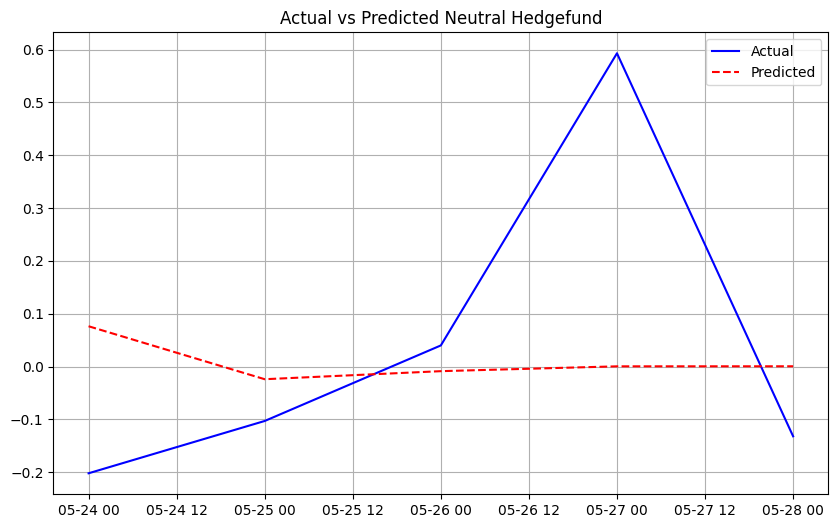

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(test_neutral, label='Actual', color='blue')
plt.plot(ar_neutral_predict, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Neutral Hedgefund')
plt.legend()
plt.grid(True)
plt.show()

#### Repeat for S&P500

In [16]:
train_sp500= hedgefunds.loc[:'2010-05-21', 'r_sp500']
test_sp500 = hedgefunds.loc['2010-05-24':, 'r_sp500']

ar_model_sp500 = AutoReg(train_sp500, 2).fit()
print(ar_model_sp500.summary())

                            AutoReg Model Results                             
Dep. Variable:                r_sp500   No. Observations:                 1864
Model:                     AutoReg(2)   Log Likelihood               -3148.307
Method:               Conditional MLE   S.D. of innovations              1.312
Date:                Wed, 22 Oct 2025   AIC                           6304.615
Time:                        19:38:29   BIC                           6326.732
Sample:                    04-03-2003   HQIC                          6312.765
                         - 05-21-2010                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0146      0.030      0.479      0.632      -0.045       0.074
r_sp500.L1    -0.1408      0.023     -6.116      0.000      -0.186      -0.096
r_sp500.L2    -0.1065      0.023     -4.618      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [21]:
ar_sp500_predict = ar_model_sp500.predict(start=test_sp500.index[0], end=test_sp500.index[-1], dynamic=False)
rmse_ar_sp500 = np.sqrt(mean_squared_error(test_sp500, ar_sp500_predict))
mae_ar_sp500 = mean_absolute_error(test_sp500, ar_sp500_predict)
print(f"RMSE: {rmse_ar_sp500:.4f} \nMAE: {mae_ar_sp500:.4f}")

RMSE: 1.7060 
MAE: 1.3558


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


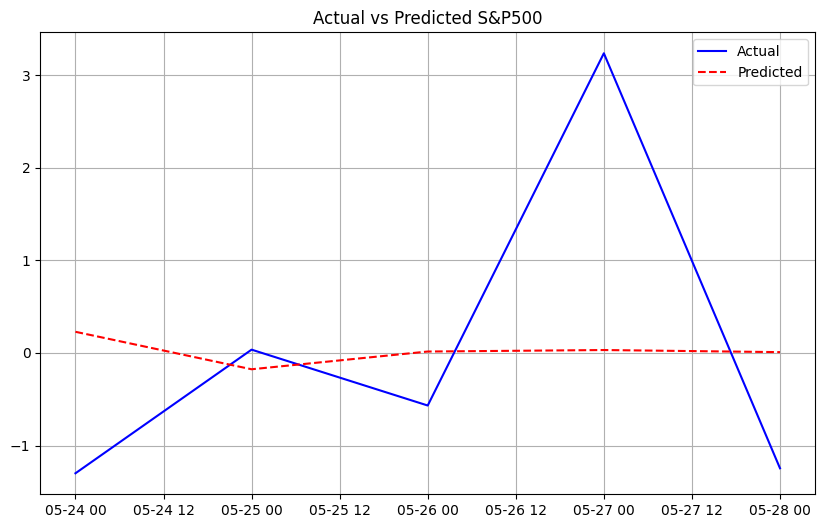

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(test_sp500, label='Actual', color='blue')
plt.plot(ar_sp500_predict, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted S&P500')
plt.legend()
plt.grid(True)
plt.show()

#### Estimating VAR for Neutral Hedgefund + S&P500

In [24]:
from statsmodels.tsa.api import VAR

train_var = hedgefunds.loc[:'2010-05-21', ['r_neutral', 'r_sp500']]
test_var = hedgefunds.loc['2010-05-24':, ['r_neutral', 'r_sp500']]

var_model = VAR(train_var).fit(2)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Oct, 2025
Time:                     19:47:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.99438
Nobs:                     1862.00    HQIC:                  -2.01314
Log likelihood:          -3389.71    FPE:                   0.132115
AIC:                     -2.02408    Det(Omega_mle):        0.131409
--------------------------------------------------------------------
Results for equation r_neutral
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.000199         0.006424           -0.031           0.975
L1.r_neutral         0.129972         0.023265            5.587           0.000
L1.r_sp500          -0.000609         0.004886           -0.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [33]:
forecast_var = var_model.forecast(train_var.values[-2:], steps=len(test_var))
forecast_var_df = pd.DataFrame(forecast_var, index=test_var.index, columns=['r_neutral_pred', 'r_sp500_pred'])

rmse_var_sp500 = np.sqrt(mean_squared_error(test_sp500, forecast_var_df['r_sp500_pred']))
mae_var_sp500 = mean_absolute_error(test_sp500, forecast_var_df['r_sp500_pred'])

rmse_var_neutral = np.sqrt(mean_squared_error(test_neutral, forecast_var_df['r_neutral_pred']))
mae_var_neutral = mean_absolute_error(test_neutral, forecast_var_df['r_neutral_pred'])

print(f"S&P 500 - RMSE: {rmse_var_sp500:.4f} \nMAE: {mae_var_sp500:.4f}\nNeutral - RMSE: {rmse_var_neutral:.4f} \nMAE: {mae_var_neutral:.4f} ")


S&P 500 - RMSE: 1.7019 
MAE: 1.3509
Neutral - RMSE: 0.2990 
MAE: 0.2233 


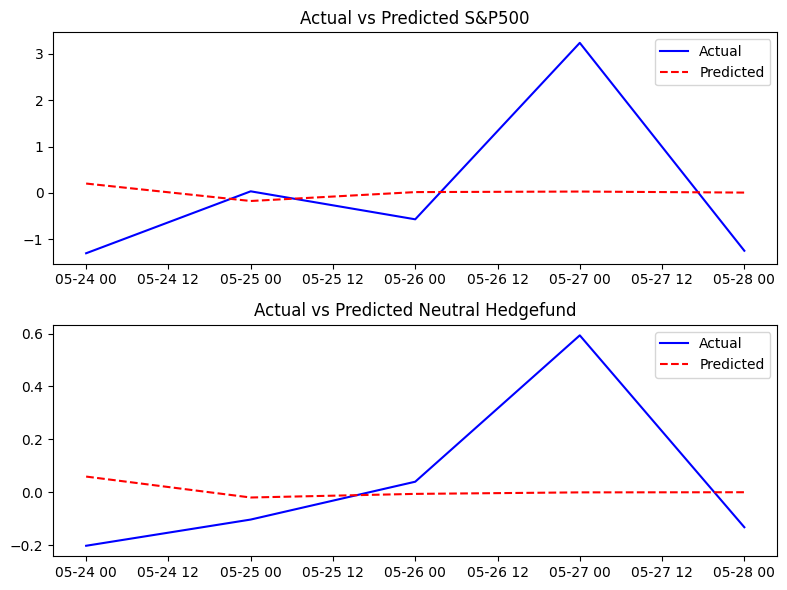

In [30]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(test_var['r_sp500'], label='Actual', color='blue')
plt.plot(forecast_var_df['r_sp500_pred'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted S&P500')
plt.legend()

plt.subplot(2,1,2)
plt.plot(test_var.index, test_var['r_neutral'], label='Actual', color='blue')
plt.plot(forecast_var_df.index, forecast_var_df['r_neutral_pred'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Neutral Hedgefund')
plt.legend()

plt.tight_layout()
plt.show()

#### Comparing Models

In [35]:
errors_df = pd.DataFrame({
    'Model': ['AR Neutral', 'AR SP500', 'VAR Neutral', 'VAR SP500'],
    'RMSE': [rmse_ar_neutral, rmse_ar_sp500, rmse_var_neutral, rmse_var_sp500],
    'MAE': [mae_ar_neutral, mae_ar_sp500, mae_var_neutral, mae_var_sp500]
})

errors_df

,Model,RMSE,MAE
0,AR Neutral,0.301590,0.226235
1,AR SP500,1.705963,1.355842
2,VAR Neutral,0.298960,0.223257
3,VAR SP500,1.701870,1.350932


#### We see that VAR(2) model has predicted both Heutral Hedgefund and S&P500 better than ordinary AR(2).
#### However, it seems that the differences in quality of predictions are not significant: let's use Diebold-Mariano test:

In [41]:
from scipy import stats

def dm_test(actual, pred1, pred2, h=1, crit="MSE"):
    e1 = np.array(actual) - np.array(pred1)
    e2 = np.array(actual) - np.array(pred2)

    if crit == "MSE":
        d = e1**2 - e2**2
    elif crit == "MAD":
        d = np.abs(e1) - np.abs(e2)
    else:
        raise ValueError("crit must be 'MSE' or 'MAD'")

    d_mean = np.mean(d)
    d_var = np.var(d, ddof=1)
    dm_stat = d_mean / np.sqrt(d_var / len(d))

    p_value = 2 * (1 - stats.t.cdf(abs(dm_stat), df=len(d)-1))

    return dm_stat, p_value

print("SP500 Comparison AR vs VAR:")
dm_mse, p_mse = dm_test(test_sp500, ar_sp500_predict, forecast_var_df['r_sp500_pred'], crit="MSE")
dm_mad, p_mad = dm_test(test_sp500, ar_sp500_predict, forecast_var_df['r_sp500_pred'], crit="MAD")
print(f"MSE: DM={dm_mse:.4f}, p-value={p_mse:.4f}")
print(f"MAD: DM={dm_mad:.4f}, p-value={p_mad:.4f}")

print("\nNeutral Comparison AR vs VAR:")
dm_mse_n, p_mse_n = dm_test(test_neutral, ar_neutral_predict, forecast_var_df['r_neutral_pred'], crit="MSE")
dm_mad_n, p_mad_n = dm_test(test_neutral, ar_neutral_predict, forecast_var_df['r_neutral_pred'], crit="MAD")
print(f"MSE: DM={dm_mse_n:.4f}, p-value={p_mse_n:.4f}")
print(f"MAD: DM={dm_mad_n:.4f}, p-value={p_mad_n:.4f}")

SP500 Comparison AR vs VAR:
MSE: DM=0.8905, p-value=0.4235
MAD: DM=0.9440, p-value=0.3986

Neutral Comparison AR vs VAR:
MSE: DM=0.8334, p-value=0.4515
MAD: DM=0.8149, p-value=0.4609


#### We see that the differences between the predictions of these models are not statistically significant. Thus, we cannot really conclude that one of the model yields superior forecasts.

#### Let's try to mix the forecasts to improve their accuracy.

In [49]:
import statsmodels.api as sm

forecast_data = pd.DataFrame({
    'actual': test_neutral,
    'ar': ar_neutral_predict,
    'var': forecast_var_df['r_neutral_pred']})

y = forecast_data['actual']
X = forecast_data[['ar', 'var']]
X = sm.add_constant(X)

model_constrained = sm.OLS(y, X).fit()
print(model_constrained.summary())

                            OLS Regression Results                            
Dep. Variable:                 actual   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                 -0.792
Method:                 Least Squares   F-statistic:                    0.1160
Date:                Wed, 22 Oct 2025   Prob (F-statistic):              0.896
Time:                        20:46:49   Log-Likelihood:               -0.59432
No. Observations:                   5   AIC:                             7.189
Df Residuals:                       2   BIC:                             6.017
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0461      0.214      0.215      0.8

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [50]:
combined_predict = model_constrained.predict(X)

rmse_combined = np.sqrt(mean_squared_error(y, combined_predict))
mae_combined = mean_absolute_error(y, combined_predict)

print(f"Combined")
print(f"RMSE: {rmse_combined:.4f}")
print(f"MAE:  {mae_combined:.4f}")

Combined
RMSE: 0.2725
MAE:  0.2133


#### We see that the quality of predicting has significantly increase, however, as you might menioned, this regression does not use w(1) + w(2) = 1 and w(1) >= 0, w(2) >= 0 conditions, so the coefficients cannot be interpretated + they are not significant.
#### Thus, let's manually try to solve the problem with these restrictions:

In [52]:
import scipy.optimize as optimize

y = test_neutral.values
f_ar = ar_neutral_predict.values
f_var = forecast_var_df['r_neutral_pred'].values

def objective(w):
    w0, w1 = w
    w2 = 1 - w1
    y_pred = w0 + w1*f_ar + w2*f_var
    return np.sum((y - y_pred)**2)

bounds = [(None, None), [0, 1]]

result = optimize.minimize(objective, x0=[0, 0.5], bounds=bounds)
w0_opt, w1_opt = result.x
w2_opt = 1 - w1_opt

print(f"ω₀ = {w0_opt:.4f}")
print(f"ω₁ = {w1_opt:.4f}")
print(f"ω₂ = {w2_opt:.4f}")

combined_predict = w0_opt + w1_opt*f_ar + w2_opt*f_var

rmse_combined = np.sqrt(mean_squared_error(y, combined_predict))
mae_combined = mean_absolute_error(y, combined_predict)

print(f"Combined")
print(f"RMSE: {rmse_combined:.4f}")
print(f"MAE:  {mae_combined:.4f}")

ω₀ = 0.0325
ω₁ = 0.0000
ω₂ = 1.0000
Combined
RMSE: 0.2972
MAE:  0.2297


#### We see that the model suggests using only VAR estimates + constant term: the predictions are slightly better than ordinary VAR, however it seems that the difference is not significant.

# Question 2

In [53]:
pv = pd.read_csv('/content/drive/MyDrive/HSE/pv.csv')
pv

,Date,P,D,E,CPI,Date Fraction,Long IR GS10,Real Price,Real Dividend,Real Earnings,CAPE (P/E10),Date (CCYY-MM)
0,1871.01,4.44,0.26,0.4,12.460,1871.04,5.32,86.98,5.09,7.84,NaN,1871-01
1,1871.02,4.50,0.26,0.4,12.840,1871.13,5.32,85.54,4.94,7.60,NaN,1871-02
2,1871.03,4.61,0.26,0.4,13.030,1871.21,5.33,86.36,4.87,7.49,NaN,1871-03
3,1871.04,4.74,0.26,0.4,12.560,1871.29,5.33,92.15,5.05,7.78,NaN,1871-04
4,1871.05,4.86,0.26,0.4,12.270,1871.38,5.33,96.69,5.17,7.96,NaN,1871-05
...,...,...,...,...,...,...,...,...,...,...,...,...
1751,2016.12,2246.63,45.70,NaN,241.432,2016.96,2.49,2272.16,46.22,NaN,27.93,2016-12
1752,2017.01,2275.12,45.93,NaN,242.839,2017.04,2.43,2287.65,46.18,NaN,28.17,2017-01
1753,2017.02,2329.91,46.15,NaN,243.603,2017.12,2.42,2335.39,46.26,NaN,28.81,2017-02
1754,2017.03,2345.96,46.38,NaN,243.985,2017.21,2.48,2347.80,46.42,NaN,29.02,2017-03


#### Estimating AR(1)

In [60]:
re_t = 100 * np.log(pv['P'] / pv['P'].shift(1)).dropna()

re_model = AutoReg(re_t, lags=1, trend='c').fit()
residuals = re_model.resid

print(re_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      P   No. Observations:                 1755
Model:                     AutoReg(1)   Log Likelihood               -4873.554
Method:               Conditional MLE   S.D. of innovations              3.895
Date:                Wed, 22 Oct 2025   AIC                           9753.107
Time:                        21:25:01   BIC                           9769.516
Sample:                             1   HQIC                          9759.172
                                 1755                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2554      0.093      2.736      0.006       0.072       0.438
P.L1           0.2840      0.023     12.406      0.000       0.239       0.329
                                    Roots           

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


#### Simulations of forecasts

In [104]:
import random

phi0, phi1 = re_model.params[0], re_model.params[1]
re_last = re_t.iloc[-1]
price_last = pv['P'].iloc[-1]
n = 1000
T = 6
simulations = []

for i in range(n):
  x = re_last
  p = price_last
  for j in range(T):
    x = phi0 + phi1*x + random.choice(residuals.values)
    p *= (np.exp(x/100))
  simulations.append(p)

/tmp/ipython-input-4107416755.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi0, phi1 = re_model.params[0], re_model.params[1]


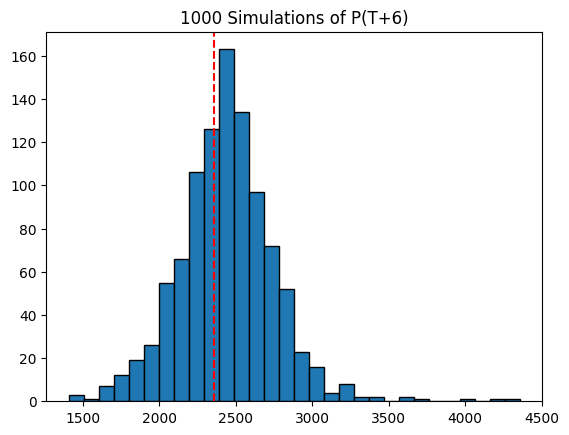

In [107]:
plt.hist(simulations, bins=30, edgecolor='black')
plt.axvline(price_last, color='red', linestyle='--')
plt.title('1000 Simulations of P(T+6)')
plt.show()

#### VaR(99%) for P(T+6) calculation

In [117]:
var_99 = price_last - np.percentile(simulations, 1)
print(f"6-month 99% VaR: {var_99:.0f}$")

6-month 99% VaR: 658$
